In [1]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray
from shapely.geometry import mapping
%matplotlib inline

In [2]:
# load sota basin shapefile
sota = gpd.read_file('./data/input/sota_basin.shp')

In [3]:
# change projection system of sota to EPSG:4326
sota = sota.to_crs('EPSG:4326')

In [4]:
# load sota precipitation data
chirps = xr.open_dataset('./data/input/chirps-v2.0.monthly_sota.nc')

In [5]:
# add projection system to nc
pr_sota = chirps.rio.write_crs("EPSG:4326", inplace=True)

In [6]:
# clip precipitaion of sota
pr_sota = pr_sota.rio.clip(sota.geometry.apply(mapping), sota.crs)

In [7]:
# select precipitation variable aand average with time
pr_sota = pr_sota['precip'].mean('time')

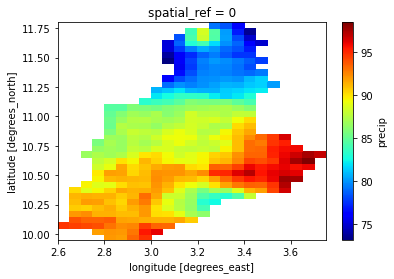

In [9]:
pr_sota.plot(cmap ='jet')

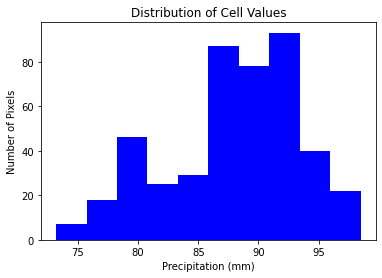

In [9]:
# plot histogram of precipitation
f, ax = plt.subplots()
pr_sota.plot.hist(color='blue')
ax.set(title="Distribution of Cell Values",
       xlabel="Precipitation (mm)",
       ylabel="Number of Pixels")
plt.show()

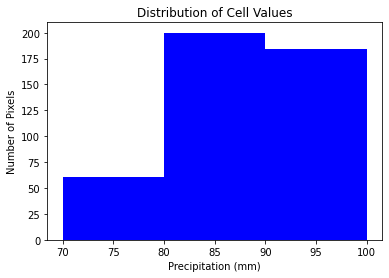

In [10]:
# group values by bin
f, ax = plt.subplots()
pr_sota.plot.hist(color='blue', bins=[70, 80, 90, 100])
ax.set(title="Distribution of Cell Values",
       xlabel="Precipitation (mm)",
       ylabel="Number of Pixels")
plt.show()

In [11]:
# create list of categories: 
class_bins = [70, 80, 90, 100]

In [12]:
# check min and max cell values
data_min_value = np.nanmin(pr_sota)
data_max_value = np.nanmax(pr_sota)
print(data_min_value, data_max_value)

73.19442 98.48073


In [13]:
# assign new values to cells
# 70 - 80 = 1
# 80 - 90 = 2
# 90 - 100 = 3
# no values = 4
pr_sota_class = xr.apply_ufunc(np.digitize, pr_sota, class_bins)

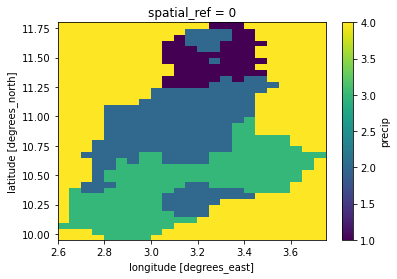

In [14]:
# plot categorized precipitation
pr_sota_class.plot()

In [15]:
# export to homogeneous climate zones of sota
#pr_sota_class.to_netcdf('./data/output/homogeneous_climate_zone.nc')